In [ ]:
# Tratamento dos dados
import numpy as np
import pandas as pd

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

from sklearn.preprocessing import StandardScaler, MinMaxScaler;

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

Entrada do projeto:

- buying:   vhigh, high, med, low. (Preço de Compra: muito alto - 4, alto - 3, médio - 2  e baixo - 1)
- maint:    vhigh, high, med, low. (Preço da Manutenção: muito alto - 4, alto - 3, médio - 2  e baixo - 1)
- doors:    2, 3, 4, 5more. (nº de portas: 2, 3, 4 e 5 ou mais)
- persons:  2, 4, more. (nº de pessoas: 2, 4 e mais)
- lug_boot: small, med, big. (tamanho do porta malas: pequeno, médio e grande)
- safety:   low, med, high. (segurança estimada do carro: baixo, médio e alto)

Saída do projeto:
- category: unacceptable, acceptable, good, very good  (Categoria/Nível de avaliação: inaceitável, aceitável, bom e muito bom)

# Preparando os dados

## Tarefa #1: Recebendo os dados

In [ ]:
# Recebendo os dados:
data_google_id = '1W_q8cnsJynWrj_1CUQ7uPyh8PFEDAV_J'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
dados = pd.read_csv("dados.csv", sep = ',')

128.0 KiB Done.


## Tarefa #2: Analise Exploratória dos Dados

In [ ]:
dados.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,category
0,0,4.0,4.0,2,2,0.0,2.0,unacc
1,1,4.0,4.0,2,2,0.0,3.0,unacc
2,2,4.0,4.0,2,2,1.0,1.0,unacc
3,3,4.0,4.0,2,2,1.0,2.0,unacc
4,4,4.0,4.0,2,2,1.0,3.0,unacc


A coluna `Unnamed: 0` tem apenas os números dos index do nosso conjunto de dados. Deveremos remover essa coluna.

In [ ]:
dados.shape

(4836, 8)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4836 non-null   int64  
 1   buying      4813 non-null   float64
 2   maint       4819 non-null   float64
 3   doors       4824 non-null   object 
 4   persons     4821 non-null   object 
 5   lug_boot    4815 non-null   float64
 6   safety      4819 non-null   float64
 7   category    4816 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 302.4+ KB


Temos colunas do tipo object. Além disso, segunda as informações obtidas do conjunto de dados temos diversas colunas que são categóricas mas que já estão convertidas em valores numéricos. Entretanto teremos que tratar as colunas que estão com valores object.

In [ ]:
dados.isnull().sum()

Unnamed: 0     0
buying        23
maint         17
doors         12
persons       15
lug_boot      21
safety        17
category      20
dtype: int64

Temos valores nulos no nosso conjunto de dados. Logo DEVEMOS fazer o tratamento disso removendo os valores nulos

In [ ]:
dados.describe()

,Unnamed: 0,buying,maint,lug_boot,safety
count,4836.000000,4813.000000,4819.000000,4815.000000,4819.000000
mean,2417.500000,1.947434,2.048558,1.171547,2.428097
std,1396.177281,1.017072,1.018777,0.789985,0.694794
min,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1208.750000,1.000000,1.000000,1.000000,2.000000
50%,2417.500000,2.000000,2.000000,1.000000,3.000000
75%,3626.250000,3.000000,3.000000,2.000000,3.000000
max,4835.000000,4.000000,4.000000,2.000000,3.000000


Todas as colunas possuem valores na mesma ordem de grandeza. Logo não haverá necessidade de transformar as escalas dos valores de cada coluna.

## Tarefa#3: Tratamento dos dados

Removendo a coluna sem dados informativos:

In [ ]:
dados.drop(columns=['Unnamed: 0'], inplace = True)

Removendo os valores nulos:

In [ ]:
dados.dropna(inplace=True)

In [ ]:
dados.isnull().sum()

Avaliando os valores únicos em cada coluna:

In [ ]:
#colunas = ['doors', 'persons', 'category']
colunas = dados.columns

for col in colunas:
  print('='*60)
  print(col)
  print(dados[col].unique())

buying
[4. 3. 2. 1.]
maint
[4. 3. 2. 1.]
doors
['2' '3' '4' '5more']
persons
['2' '4' 'more']
lug_boot
[0. 1. 2.]
safety
[2. 3. 1.]
category
['unacc' 'acc' 'vgood' 'good']


Vamos aplicar o One Hot encoding nas colunas `doors` e `persons`:

In [ ]:
one_hot_doors = pd.get_dummies(dados['doors'],
                               prefix='doors')
one_hot_doors.head()

In [ ]:
one_hot_persons = pd.get_dummies(dados['persons'],
                                 prefix='persons')
one_hot_persons.head()

In [ ]:
dados_cor = pd.concat([dados, one_hot_doors, one_hot_persons],
                      axis = 1)
dados_cor.head()

Agora vamos fazer um drop nas colunas originais com valores do tipo object:

In [ ]:
dados_cor.drop(columns=['doors','persons'], inplace = True)

In [ ]:
dados_cor.head()

# Aplicando IA aos nossos dados

## Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [ ]:
# Dividindo os dados em entrada e saída:
X = dados_cor.drop(columns=['category']) # Entrada de saída
y = dados_cor['category']

# Divisão em Conjunto de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=25)

## Tarefa #2: Treinando os modelos

In [ ]:
# Treinando o modelo de Árvore de Decisão
clf_AD = DecisionTreeClassifier(criterion='entropy',
                                min_samples_split=4)
clf_AD.fit(X_train,y_train)
# Fazendo as previsões do modelo:
y_pred_AD = clf_AD.predict(X_test)

In [ ]:
# Treinando o modelo do Random Forest
clf_RFC = RandomForestClassifier(min_samples_split=4,
                                 n_estimators=10)
clf_RFC.fit(X_train,y_train)
# Fazendo as previsões do modelo:
y_pred_RFC = clf_RFC.predict(X_test)

In [ ]:
# Treinando o modelo do Gradient Boosting Classiefier
clf_GBC = GradientBoostingClassifier(min_samples_split=4,
                                     n_estimators=10)
clf_GBC.fit(X_train,y_train)
# Fazendo as predições do modelo:
y_pred_GBC = clf_GBC.predict(X_test)

## Tarefa #3: Métricas de desempenho do modelo

Obtendo as matrizes de confusão:

In [ ]:
labels_proj = dados['category'].unique()
labels_proj

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
cm_AD = confusion_matrix(y_true=y_test,
                         y_pred=y_pred_AD,
                         labels=labels_proj)
cm_AD

array([[226,   2,   0,   1],
       [  0, 248,   0,   0],
       [  0,   0, 225,   0],
       [  0,   0,   0, 241]])

In [ ]:
cm_RFC = confusion_matrix(y_true=y_test,
                          y_pred=y_pred_RFC,
                          labels=labels_proj)
cm_RFC

array([[217,  10,   0,   2],
       [  0, 246,   0,   2],
       [  0,   0, 225,   0],
       [  0,   0,   0, 241]])

In [ ]:
cm_GBC = confusion_matrix(y_true=y_test,
                          y_pred=y_pred_GBC,
                          labels=labels_proj)
cm_GBC

array([[168,  59,   0,   2],
       [  0, 202,  22,  24],
       [  0,   0, 225,   0],
       [  0,   0,  37, 204]])

In [ ]:
matrizes_confusao = {'Arvore de Decisão' : cm_AD,
                     'Random Forest' : cm_RFC,
                     'GBC' : cm_GBC}

In [ ]:
matrizes_confusao['Arvore de Decisão']

array([[226,   2,   0,   1],
       [  0, 248,   0,   0],
       [  0,   0, 225,   0],
       [  0,   0,   0, 241]])

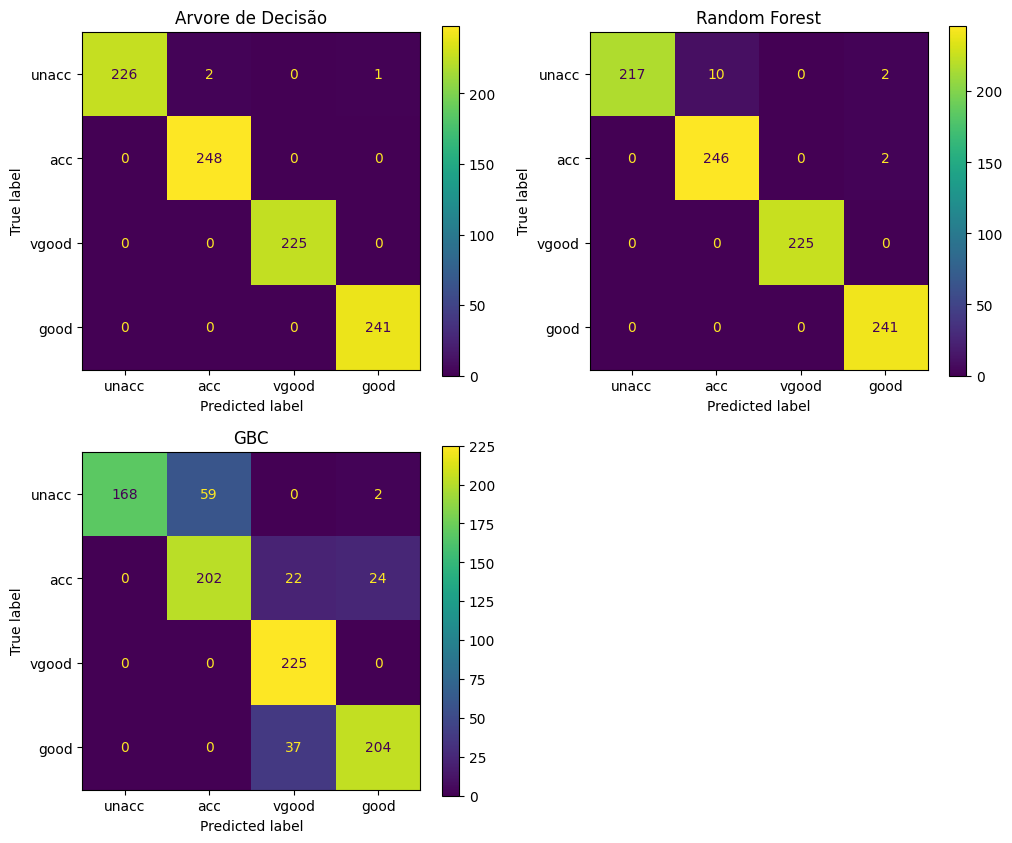

In [ ]:
figure = plt.figure(figsize=(12,10))

for i, (nome_clf, cm) in enumerate(matrizes_confusao.items()):
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=labels_proj)
  ax = plt.subplot(2,2,i+1)
  disp.plot(ax=ax,values_format='d')
  ax.set_title(nome_clf)


Obtendo as métricas:

In [ ]:
prev_modelo = {'Arvore de Decisao' : y_pred_AD,
               'Random Forest' : y_pred_RFC,
               'GBC' : y_pred_GBC}

In [ ]:
prev_modelo['GBC']

In [ ]:
for nome_clf, y_pred in prev_modelo.items():
  print('='*65)
  print(nome_clf)
  print(classification_report(y_pred=y_pred,
                              y_true=y_test))

In [ ]:
import math
-3*(1/5)*math.log(1/5)/math.log(2)-(2/5)*math.log(2/5)/math.log(2)

1.9219280948873625

Podemos perceber que o modelo de arvore de decisão foi o que obteve o melhor desempenho nesse cenário. Entretanto, esse conjunto de dados é um exemplo simples de problema que pode ser resolvido por modelos baseados em árvores. Por isso, ele foi escolhido para essa aula

In [ ]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(100,100))

_ = plot_tree(clf_AD,
              feature_names=X_train.columns,
              class_names=y_train.unique(),
              filled=True,
              rounded=True,
              ax=ax)
plt.savefig('ArvoredeDecisao.png')